### Convert json tag to view in labelimg

#### sample code for results
```python
result=[]
result.append({'name': image_name(str),'category': defect_label(int),'bbox':bbox(xyxy,float),'score': score(float)})
import json
with open('result.json', 'w') as fp:
     json.dump(result, fp, indent=4, ensure_ascii=False)
```

#### id和瑕疵名的对应关系如下：

```python
{
  "0": "背景",
  "1": "边异常",
  "2": "角异常",
  "3": "白色点瑕疵",
  "4": "浅色块瑕疵",
  "5": "深色点块瑕疵",
  "6": "光圈瑕疵"
 }
```

In [2]:
import json
with open('./tcdata/tile_round1_train_20201231/train_annos.json', 'r') as fp:
     results=json.load(fp)

In [3]:
import numpy as np

In [14]:
np.mean([1,3])

2.0

In [16]:
results[1]['name'].split('.j')[0]

'235_2_t20201127123021723_CAM2'

In [21]:
def get_yolo_box(dict_data):
    fname=dict_data['name'].split('.j')[0]
    xy=dict_data['bbox']
    w=dict_data['image_width']
    h=dict_data['image_height']
    out_x=np.mean([xy[0],xy[2]])/w
    out_y=np.mean([xy[1],xy[3]])/h
    out_w=(xy[2]-xy[0])/w
    out_h=(xy[3]-xy[1])/h
    out_string="{} {:.6f} {:.6f} {:.6f} {:.6f}\n".format(dict_data['category'],out_x,out_y,out_w,out_h)
    with open('./tcdata/tile_round1_train_20201231/train_imgs/'+fname+'.txt','a+') as f:
        f.write(out_string)

In [25]:
for dict_data in results:
    get_yolo_box(dict_data)

In [2]:
results[1]

{'name': '235_2_t20201127123021723_CAM2.jpg',
 'image_height': 6000,
 'image_width': 8192,
 'category': 5,
 'bbox': [1876.06, 998.04, 1883.06, 1004.04]}

In [4]:
import pandas as pd

In [5]:
results_df=pd.DataFrame(results)

In [8]:
results_df.image_height.value_counts()

6000    12563
3500     2667
Name: image_height, dtype: int64

In [10]:
results_df.image_width.value_counts()

8192    12563
4096     2667
Name: image_width, dtype: int64

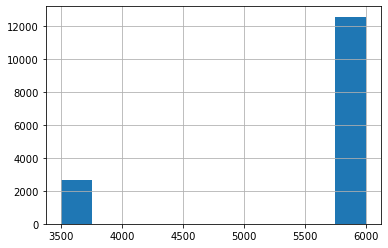

In [7]:
results_df.image_height.hist()

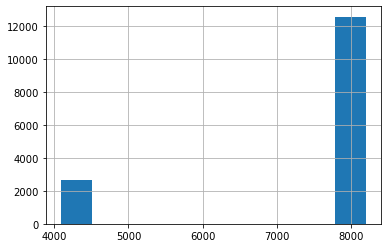

In [8]:
results_df.image_width.hist()

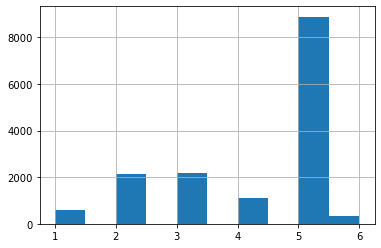

In [9]:
results_df.category.hist()

In [6]:
results_df['defect_w']=results_df.bbox.apply(lambda x:x[2]-x[0])

In [7]:
results_df['defect_h']=results_df.bbox.apply(lambda x:x[3]-x[1])

In [8]:
results_df.head()

,name,image_height,image_width,category,bbox,defect_w,defect_h
0,223_89_t20201125085855802_CAM3.jpg,3500,4096,4,"[1702.79, 2826.53, 1730.79, 2844.53]",28.0,18.0
1,235_2_t20201127123021723_CAM2.jpg,6000,8192,5,"[1876.06, 998.04, 1883.06, 1004.04]",7.0,6.0
2,235_2_t20201127123021723_CAM2.jpg,6000,8192,5,"[1655.06, 1094.04, 1663.06, 1102.04]",8.0,8.0
3,235_2_t20201127123021723_CAM2.jpg,6000,8192,5,"[1909.06, 1379.04, 1920.06, 1388.04]",11.0,9.0
4,235_2_t20201127123021723_CAM2.jpg,6000,8192,5,"[1804.06, 1400.04, 1816.06, 1412.04]",12.0,12.0


In [9]:
results_df.defect_h.mean()

22.78614445173965

In [10]:
results_df.defect_h.describe()

count    15230.000000
mean        22.786144
std         40.723015
min          3.190000
25%         10.000000
50%         13.000000
75%         18.000000
max        891.470000
Name: defect_h, dtype: float64

In [11]:
results_df.defect_w.describe()

count    15230.000000
mean        24.727670
std         60.381061
min          2.590000
25%         10.000000
50%         13.000000
75%         20.000000
max       4889.090000
Name: defect_w, dtype: float64

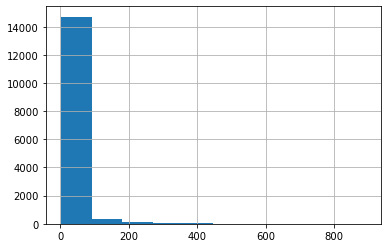

In [14]:
results_df.defect_h.hist()

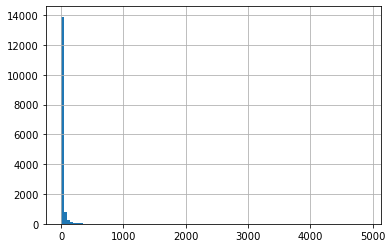

In [17]:
results_df.defect_w.hist(bins=100)

In [1]:
import json
with open('./tcdata/results20210113.json', 'r') as fp:
     results=json.load(fp)

In [2]:
import numpy as np

In [3]:
results[1]['name'].split('.j')[0]

'197_104_t20201119094108582_CAM1'

In [4]:
def get_yolo_box(dict_data):
    fname=dict_data['name'].split('.j')[0]
    xy=dict_data['bbox']
    w=dict_data['image_width']
    h=dict_data['image_height']
    out_x=np.mean([xy[0],xy[2]])/w
    out_y=np.mean([xy[1],xy[3]])/h
    out_w=(xy[2]-xy[0])/w
    out_h=(xy[3]-xy[1])/h
    out_string="{} {:.6f} {:.6f} {:.6f} {:.6f}\n".format(dict_data['category'],out_x,out_y,out_w,out_h)
    with open('./tcdata/round1_testA_labels2/'+fname+'.txt','a+') as f:
        f.write(out_string)

In [5]:
for dict_data in results:
    get_yolo_box(dict_data)